# Conventional power plants

- [Data : List of conventional power plants in Germany and European countries](https://data.open-power-system-data.org/conventional_power_plants/2020-10-01)

- [Conventional Power Plants: Main notebook](https://nbviewer.org/github/Open-Power-System-Data/conventional_power_plants/blob/2020-10-01/main.ipynb)


### This datapackage contains data on conventional power plants for Germany as well as other selected European countries. The data includes individual power plants with their technical characteristics. These include installed capacity, main energy source, type of technology, CHP capability, and geographical information. The geographical scope is primarily on Germany and its neighboring countries. The datapackage currently covers Germany, Austria, Belgium, Switzerland, Czech Republic, Denmark, Spain, Finland, France, Italy, the Netherlands, Norway, Poland, Sweden, Slovakia, Slovenia, and United Kingdom. Due to varying data quality of publicly available data, not all information can be provided for each country. Sources for European countries comprise detailed power plants lists from national institutions, ministries, or market participants as well as manually compiled lists of power plants for countries without a system-wide power plant list. All data processing is conducted in Python and pandas, and has been documented in the Jupyter Notebooks linked below.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [44]:
df = pd.read_csv("./conventional_power_plants_EU_filtered.csv")

In [45]:
df.head()

,name,company,street,postcode,city,country,capacity,energy_source,technology,chp,...,type,lat,lon,eic_code,energy_source_level_1,energy_source_level_2,energy_source_level_3,additional_info,comment,source
0,Marcinelle Energie (Carsid),DIRECT ENERGIE,NaN,NaN,NaN,BE,413.0,Natural gas,Combined cycle,NaN,...,NaN,50.41396,4.40645,22WMARCIN000179H,Fossil fuels,Natural gas,NaN,NaN,NaN,https://www.elia.be/en/grid-data/power-generat...
1,Aalst Syral GT,Electrabel,NaN,NaN,NaN,BE,43.0,Natural gas,Gas turbine,Yes,...,CHP/IPP,NaN,NaN,NaN,Fossil fuels,Natural gas,NaN,NaN,NaN,https://www.elia.be/en/grid-data/power-generat...
2,Aalst Syral ST,Electrabel,NaN,NaN,NaN,BE,5.0,Natural gas,Steam turbine,Yes,...,CHP/IPP,NaN,NaN,NaN,Fossil fuels,Natural gas,NaN,NaN,NaN,https://www.elia.be/en/grid-data/power-generat...
3,AALTER TJ,Electrabel,NaN,NaN,NaN,BE,18.0,Oil,Gas turbine,NaN,...,NaN,NaN,NaN,NaN,Fossil fuels,Oil,NaN,NaN,NaN,https://www.elia.be/en/grid-data/power-generat...
4,Amercoeur 1 R TGV,Electrabel,NaN,NaN,NaN,BE,451.0,Natural gas,Combined cycle,NaN,...,NaN,50.43004,4.39518,22WAMERCO000010Y,Fossil fuels,Natural gas,NaN,NaN,NaN,https://www.elia.be/en/grid-data/power-generat...


In [46]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
capacity,5923.0,99.013122,238.110816,0.000000,1.500000,12.00000,70.00000,3446.000000
commissioned,4854.0,1981.136588,28.291739,1899.000000,1962.000000,1987.00000,2006.00000,2020.000000
lat,2781.0,49.067798,4.981134,36.183459,46.410160,48.66046,51.53482,67.729796
lon,2781.0,8.133723,7.069562,-8.849735,6.321111,8.45294,11.58636,30.426259


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5945 entries, 0 to 5944
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   5945 non-null   object 
 1   company                4420 non-null   object 
 2   street                 940 non-null    object 
 3   postcode               4030 non-null   object 
 4   city                   4974 non-null   object 
 5   country                5945 non-null   object 
 6   capacity               5923 non-null   float64
 7   energy_source          5943 non-null   object 
 8   technology             4962 non-null   object 
 9   chp                    1094 non-null   object 
 10  commissioned           4854 non-null   float64
 11  type                   271 non-null    object 
 12  lat                    2781 non-null   float64
 13  lon                    2781 non-null   float64
 14  eic_code               993 non-null    object 
 15  ener

In [48]:
cols = df.columns

In [49]:
cols


Index(['name', 'company', 'street', 'postcode', 'city', 'country', 'capacity',
       'energy_source', 'technology', 'chp', 'commissioned', 'type', 'lat',
       'lon', 'eic_code', 'energy_source_level_1', 'energy_source_level_2',
       'energy_source_level_3', 'additional_info', 'comment', 'source'],
      dtype='object')

In [50]:
cols_obj = df.select_dtypes(include=['object']).columns


In [51]:
for col in cols_obj:
    print(f"Number of unique values in column “{col}”: {df[col].nunique()}")
    if df[col].nunique() < 20:
        print(f"And the {col} values: {df[col].unique()}.\n")


Number of unique values in column “name”: 5851
Number of unique values in column “company”: 1290
Number of unique values in column “street”: 521
Number of unique values in column “postcode”: 756
Number of unique values in column “city”: 1866
Number of unique values in column “country”: 18
And the country values: ['BE' 'NL' 'FR' 'PL' 'CZ' 'CH' 'IT' 'FI' 'ES' 'UK' 'NO' 'SE' 'SK' 'SI'
 'AT' 'DK ' 'DE' 'LU'].

Number of unique values in column “energy_source”: 14
And the energy_source values: ['Natural gas' 'Oil' 'Biomass and biogas' 'Hydro' 'Nuclear'
 'Non-renewable waste' 'Mixed fossil fuels' 'Hard coal'
 'Other or unspecified energy sources' 'Lignite' 'Bioenergy'
 'Other fossil fuels' nan 'Other fuels' 'Waste'].

Number of unique values in column “technology”: 11
And the technology values: ['Combined cycle' 'Gas turbine' 'Steam turbine' nan 'Pumped storage'
 'Run-of-river' 'Reservoir' 'Pumped storage with natural inflow' 'chp'
 'Combustion Engine' 'RES' 'Storage technologies'].

Number 

In [52]:
countries_dic = {
    'NL': 'Netherlands',
    'FR': 'France',
    'PL': 'Poland',
    'CZ': 'Czech Republic',
    'CH': 'Switzerland',
    'IT': 'Italy',
    'FI': 'Finland',
    'ES': 'Spain',
    'UK': 'United Kingdom',
    'NO': 'Norway',
    'SE': 'Sweden',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'AT': 'Austria',
    'DK': 'Denmark'
}


In [53]:
df['chp'] = df['chp'].str.replace('Yes', 'yes')


In [54]:
df['chp'].unique()


array([nan, 'yes', 'no'], dtype=object)

In [55]:
len(df[df.isna().all(axis=1)])  # check all nan values OK


0

In [56]:
len(df[df.duplicated()])  # check duplicated values OK


0

In [57]:
energy_source_ls = df['energy_source'].unique()


In [58]:
energy_source_ls

array(['Natural gas', 'Oil', 'Biomass and biogas', 'Hydro', 'Nuclear',
       'Non-renewable waste', 'Mixed fossil fuels', 'Hard coal',
       'Other or unspecified energy sources', 'Lignite', 'Bioenergy',
       'Other fossil fuels', nan, 'Other fuels', 'Waste'], dtype=object)

In [59]:
len(df.query("energy_source == 'Natural gas'")
    )


540

In [60]:
for resource in energy_source_ls:
    count = len(df.query(f"energy_source == '{resource}'"))
    print(
        f"The number of facilities based on the energy source of {resource} is {count}.")


The number of facilities based on the energy source of Natural gas is 540.
The number of facilities based on the energy source of Oil is 124.
The number of facilities based on the energy source of Biomass and biogas is 156.
The number of facilities based on the energy source of Hydro is 4098.
The number of facilities based on the energy source of Nuclear is 114.
The number of facilities based on the energy source of Non-renewable waste is 39.
The number of facilities based on the energy source of Mixed fossil fuels is 142.
The number of facilities based on the energy source of Hard coal is 366.
The number of facilities based on the energy source of Other or unspecified energy sources is 11.
The number of facilities based on the energy source of Lignite is 212.
The number of facilities based on the energy source of Bioenergy is 3.
The number of facilities based on the energy source of Other fossil fuels is 11.
The number of facilities based on the energy source of nan is 0.
The number o

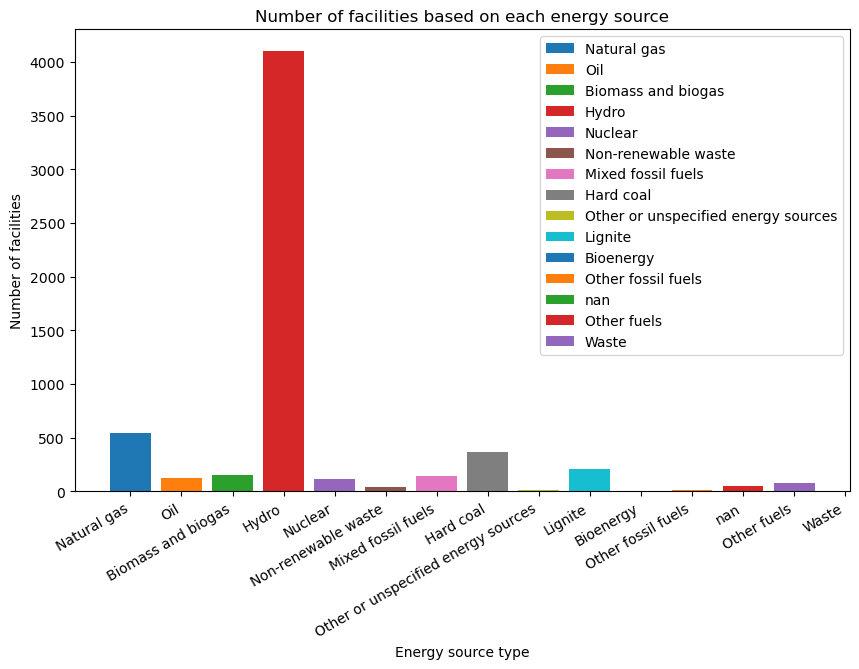

In [61]:
_, ax = plt.subplots(figsize=(10, 6))

for resource in energy_source_ls:
    count = len(df.query(f"energy_source == '{resource}'"))
    ax.bar(resource, count, label=resource)

ax.set_xticks(range(len(energy_source_ls)))
ax.set_xticklabels(energy_source_ls, rotation=30, ha='right', fontsize=10)
ax.set_xlabel('Energy source type')
ax.set_ylabel('Number of facilities')
ax.set_title("Number of facilities based on each energy source")
ax.legend()

plt.show()


In [62]:
energy_source_ls


array(['Natural gas', 'Oil', 'Biomass and biogas', 'Hydro', 'Nuclear',
       'Non-renewable waste', 'Mixed fossil fuels', 'Hard coal',
       'Other or unspecified energy sources', 'Lignite', 'Bioenergy',
       'Other fossil fuels', nan, 'Other fuels', 'Waste'], dtype=object)

In [70]:
energy_source_known = ['Natural gas',
                       'Hard coal',
                       'Biomass and biogas',
                       'Nuclear',
                       'Oil',
                       'Hydro',
                       'Lignite',
                       'Fossil fuels',
                       'Mixed fossil fuels',
                       'Non-renewable waste']


In [71]:
counts_known = [
    len(df.query(f"energy_source == '{_}'")) for _ in energy_source_known]


In [72]:
counts_known


[540, 366, 156, 114, 124, 4098, 212, 0, 142, 39]

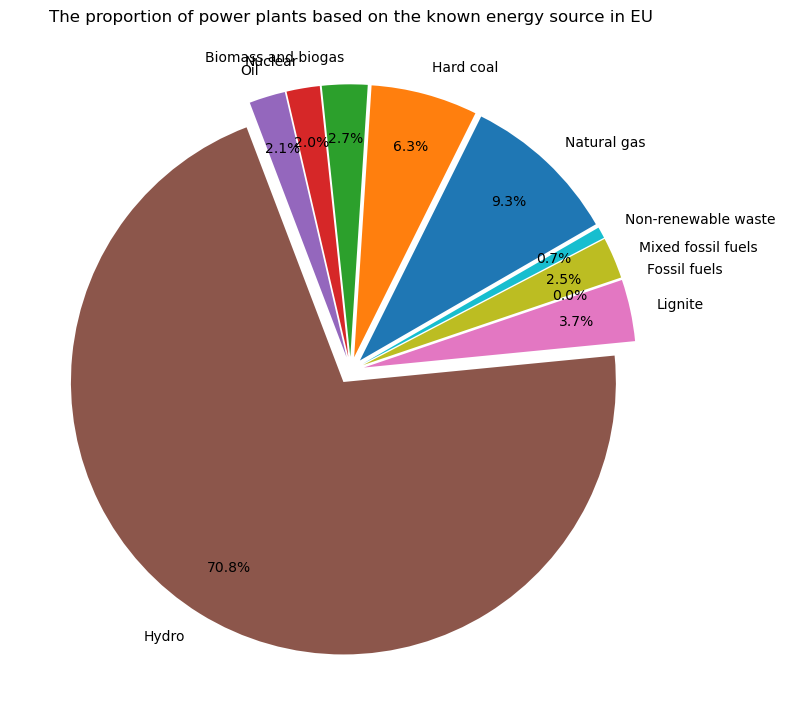

In [73]:
_, ax = plt.subplots(figsize=(8, 8))

explode = [0.05] * len(counts_known)

ax.pie(counts_known, labels=energy_source_known, autopct="%1.1f%%", labeldistance=1.1, explode=explode,
       textprops={'fontsize': 10, 'color': 'black'}, pctdistance=0.8, startangle=30)
ax.set_title(
    "The proportion of power plants based on the known energy source in EU")
plt.tight_layout()

plt.show()


In [76]:
chp_count = len(df.query("chp=='yes'"))

In [82]:
chp_count

717

In [83]:
chp_country = df.query("chp == 'Yes'")['country'].unique()


In [84]:
chp_country

array([], dtype=object)

In [79]:
chp_country = df.query("chp == 'Yes'")['country'].unique()
chp_country = [countries_dic[_] for _ in chp_country]

